# 🎯 **Use Case: Personalized Attraction Recommendations**

> *Aim:*
- Develop a recommendation system to suggest tourist attractions based on a user's historical preferences and similar users’ preferences.

> *Use Case:*
- Travel platforms can implement this system to guide users toward attractions they are most likely to enjoy, increasing user engagement and satisfaction.
- Destination management organizations can identify emerging trends and promote attractions that align with user preferences.

> *Types of Recommendation Approaches:*
- 1.	Collaborative Filtering:
        - Recommend attractions based on similar users’ ratings and preferences.
- 2.	Content-Based Filtering:
        - Suggest attractions similar to those already visited by the user based on features like attraction type, location, and amenities.
- 3.	Hybrid Systems: (Optional)
        - Combine collaborative and content-based methods for enhanced accuracy.

> *Inputs (Features):*
- User visit history: Attractions visited, ratings given.
- Attraction features: Type, location, popularity.
- Similar user data: Travel patterns and preferences.

> *Output:*
- Ranked list of recommended attractions.


In [264]:
# Core libraries
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.metrics.pairwise import cosine_similarity

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

In [265]:
# Load preprocessed dataset
Tourism_data = pd.read_csv("C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project4/Project4_Code/Tourism_Experince_Analytics/DataSets/PreProcessed_DataSet/Pre_Processed_DataSet.csv")

In [266]:
Tourism_data.head(2)

,UserId,TransactionId,VisitYear,VisitMonth,Rating,VisitDate,VisitMode,Attraction,AttractionAddress,AttractionType,CityName,Country,Region,Continent,Average rating per user,Total visits by VisitMode per user,Average rating per attraction,Total visits per user
0,70456,3,2022,10,1.0,2022-10-01,Couples,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Kerala,India,South East Asia,Asia,1.0,1,0.663674,1
1,7567,8,2022,10,1.0,2022-10-01,Friends,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Belleville,Canada,South America,America,1.0,1,0.663674,1


> *STEP 1: Collaborative Filtering*

In [267]:
#Fetch only necessary Columns
Filter  = Tourism_data[['UserId','Attraction','Rating']]
Filter

,UserId,Attraction,Rating
0,70456,Sacred Monkey Forest Sanctuary,1.00
1,7567,Sacred Monkey Forest Sanctuary,1.00
2,79069,Sacred Monkey Forest Sanctuary,1.00
3,31019,Sacred Monkey Forest Sanctuary,0.50
4,43611,Sacred Monkey Forest Sanctuary,0.50
...,...,...,...
62218,87100,Yogyakarta Palace,0.75
62219,88112,Yogyakarta Palace,1.00
62220,88112,Yogyakarta Palace,0.75
62221,88112,Yogyakarta Palace,0.75


In [268]:
user_attraction_matrix = Filter.pivot_table(index='UserId', columns='Attraction', values='Rating').fillna(0)

# Reset index to convert UserId from index to a column
user_attraction_matrix = user_attraction_matrix.reset_index()

user_attraction_matrix.columns.name = None #To remove the attraction label on the index

user_attraction_matrix

,UserId,Balekambang Beach,Bromo Tengger Semeru National Park,Coban Rondo Waterfall,Goa Cina Beach,Jodipan Colorful Village,Jomblang Cave,Kalibiru National Park,Khayangan Reflexology & Massage,Kuta Beach - Bali,...,Sempu Island,Sewu Temple,Tanah Lot Temple,Tegalalang Rice Terrace,Tegenungan Waterfall,Ullen Sentalu Museum,Uluwatu Temple,Water Castle (Tamansari),Waterbom Bali,Yogyakarta Palace
0,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,1.00,0.0,0.0,0.0,0.0,0.00,0.0
1,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,1.00,0.0,0.0,1.0,0.0,1.00,0.0
2,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.75,0.0
3,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,1.00,0.0,0.0,0.0,0.0,0.00,0.0
4,25,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33525,88179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.00,0.0
33526,88185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.75,...,0.0,0.0,1.0,0.75,0.0,0.0,1.0,0.0,0.50,0.0
33527,88187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.00,0.0,0.0,1.0,0.0,0.00,0.0
33528,88189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0


In [269]:
# Save user_attraction_matrix to CSV (for Streamlit app later)
user_attraction_matrix.to_csv('C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project4/Project4_Code/Tourism_Experince_Analytics/DataSets/Recommendation_Task_DataSet/user_attraction_matrix.csv', index=False)


In [270]:
# We'll skip UserId column → take only attraction columns
x_feature = user_attraction_matrix.drop('UserId', axis=1)
x_feature

,Balekambang Beach,Bromo Tengger Semeru National Park,Coban Rondo Waterfall,Goa Cina Beach,Jodipan Colorful Village,Jomblang Cave,Kalibiru National Park,Khayangan Reflexology & Massage,Kuta Beach - Bali,Malang City Square,...,Sempu Island,Sewu Temple,Tanah Lot Temple,Tegalalang Rice Terrace,Tegenungan Waterfall,Ullen Sentalu Museum,Uluwatu Temple,Water Castle (Tamansari),Waterbom Bali,Yogyakarta Palace
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,1.00,0.0,0.0,0.0,0.0,0.00,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,1.00,0.0,0.0,1.0,0.0,1.00,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.75,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,1.00,0.0,0.0,0.0,0.0,0.00,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.00,0.0
33526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.75,0.0,...,0.0,0.0,1.0,0.75,0.0,0.0,1.0,0.0,0.50,0.0
33527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,1.0,0.0,0.00,0.0
33528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0


In [271]:
# Transpose → we want Attraction x Attraction similarity
attraction_similarity = cosine_similarity(x_feature.T)
attraction_similarity


array([[1.00000000e+00, 4.22013409e-02, 1.21487701e-01, 1.58775996e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        8.47369776e-03, 1.04341144e-01, 7.86531127e-03, 0.00000000e+00,
        6.22680669e-03, 5.95069449e-02, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.35356772e-03, 1.15719077e-02, 0.00000000e+00,
        7.64341551e-02, 0.00000000e+00, 1.71116684e-03, 6.14691940e-03,
        0.00000000e+00, 0.00000000e+00, 2.54523532e-03, 1.37178291e-02,
        2.68922677e-03, 0.00000000e+00],
       [4.22013409e-02, 1.00000000e+00, 9.76956105e-02, 4.45034394e-02,
        7.09183458e-02, 0.00000000e+00, 1.23439795e-02, 1.15395071e-02,
        1.34890445e-02, 9.28471211e-02, 3.02449652e-02, 2.37792218e-02,
        9.11338065e-02, 4.74344199e-02, 5.98869652e-03, 1.97123013e-02,
        1.96762984e-02, 7.96567472e-03, 8.48496266e-03, 6.23176391e-03,
        3.70987162e-02, 1.00162803e-02, 7.30454689e-03, 1.42864700e-02,
        1.10701086e-02,

In [272]:
user_attraction_matrix.columns

Index(['UserId', 'Balekambang Beach', 'Bromo Tengger Semeru National Park',
       'Coban Rondo Waterfall', 'Goa Cina Beach', 'Jodipan Colorful Village',
       'Jomblang Cave', 'Kalibiru National Park',
       'Khayangan Reflexology & Massage', 'Kuta Beach - Bali',
       'Malang City Square', 'Malioboro Road', 'Merapi Volcano',
       'Mount Semeru Volcano', 'Museum Malang Tempo Doeloe', 'Nusa Dua Beach',
       'Ramayana Ballet at Prambanan', 'Ratu Boko Temple',
       'Sacred Monkey Forest Sanctuary', 'Sanur Beach', 'Seminyak Beach',
       'Sempu Island', 'Sewu Temple', 'Tanah Lot Temple',
       'Tegalalang Rice Terrace', 'Tegenungan Waterfall',
       'Ullen Sentalu Museum', 'Uluwatu Temple', 'Water Castle (Tamansari)',
       'Waterbom Bali', 'Yogyakarta Palace'],
      dtype='object')

In [273]:
user_attraction_matrix.columns.tolist()

['UserId',
 'Balekambang Beach',
 'Bromo Tengger Semeru National Park',
 'Coban Rondo Waterfall',
 'Goa Cina Beach',
 'Jodipan Colorful Village',
 'Jomblang Cave',
 'Kalibiru National Park',
 'Khayangan Reflexology & Massage',
 'Kuta Beach - Bali',
 'Malang City Square',
 'Malioboro Road',
 'Merapi Volcano',
 'Mount Semeru Volcano',
 'Museum Malang Tempo Doeloe',
 'Nusa Dua Beach',
 'Ramayana Ballet at Prambanan',
 'Ratu Boko Temple',
 'Sacred Monkey Forest Sanctuary',
 'Sanur Beach',
 'Seminyak Beach',
 'Sempu Island',
 'Sewu Temple',
 'Tanah Lot Temple',
 'Tegalalang Rice Terrace',
 'Tegenungan Waterfall',
 'Ullen Sentalu Museum',
 'Uluwatu Temple',
 'Water Castle (Tamansari)',
 'Waterbom Bali',
 'Yogyakarta Palace']

In [274]:
# Convert to DataFrame
attractions = user_attraction_matrix.columns.tolist()
attractions.remove('UserId')
attractions

['Balekambang Beach',
 'Bromo Tengger Semeru National Park',
 'Coban Rondo Waterfall',
 'Goa Cina Beach',
 'Jodipan Colorful Village',
 'Jomblang Cave',
 'Kalibiru National Park',
 'Khayangan Reflexology & Massage',
 'Kuta Beach - Bali',
 'Malang City Square',
 'Malioboro Road',
 'Merapi Volcano',
 'Mount Semeru Volcano',
 'Museum Malang Tempo Doeloe',
 'Nusa Dua Beach',
 'Ramayana Ballet at Prambanan',
 'Ratu Boko Temple',
 'Sacred Monkey Forest Sanctuary',
 'Sanur Beach',
 'Seminyak Beach',
 'Sempu Island',
 'Sewu Temple',
 'Tanah Lot Temple',
 'Tegalalang Rice Terrace',
 'Tegenungan Waterfall',
 'Ullen Sentalu Museum',
 'Uluwatu Temple',
 'Water Castle (Tamansari)',
 'Waterbom Bali',
 'Yogyakarta Palace']

In [275]:
# Create DataFrame with proper row/column names
attraction_similarity_df = pd.DataFrame(attraction_similarity, index=attractions, columns=attractions)
attraction_similarity_df

,Balekambang Beach,Bromo Tengger Semeru National Park,Coban Rondo Waterfall,Goa Cina Beach,Jodipan Colorful Village,Jomblang Cave,Kalibiru National Park,Khayangan Reflexology & Massage,Kuta Beach - Bali,Malang City Square,...,Sempu Island,Sewu Temple,Tanah Lot Temple,Tegalalang Rice Terrace,Tegenungan Waterfall,Ullen Sentalu Museum,Uluwatu Temple,Water Castle (Tamansari),Waterbom Bali,Yogyakarta Palace
Balekambang Beach,1.000000,0.042201,0.121488,0.158776,0.000000,0.000000,0.000000,0.000000,0.008474,0.104341,...,0.076434,0.000000,0.001711,0.006147,0.000000,0.000000,0.002545,0.013718,0.002689,0.000000
Bromo Tengger Semeru National Park,0.042201,1.000000,0.097696,0.044503,0.070918,0.000000,0.012344,0.011540,0.013489,0.092847,...,0.037099,0.010016,0.007305,0.014286,0.011070,0.019813,0.006282,0.011453,0.004619,0.017238
Coban Rondo Waterfall,0.121488,0.097696,1.000000,0.123354,0.074596,0.000000,0.000000,0.013655,0.007624,0.137273,...,0.021612,0.009703,0.007527,0.011225,0.007419,0.008841,0.009796,0.008485,0.001901,0.003536
Goa Cina Beach,0.158776,0.044503,0.123354,1.000000,0.000000,0.000000,0.000000,0.013449,0.003754,0.149330,...,0.081600,0.000000,0.004170,0.004993,0.000000,0.018185,0.004824,0.000000,0.001404,0.000000
Jodipan Colorful Village,0.000000,0.070918,0.074596,0.000000,1.000000,0.018287,0.000000,0.000000,0.000000,0.131507,...,0.000000,0.016362,0.004313,0.000000,0.007559,0.014730,0.003802,0.013447,0.001937,0.019297
Jomblang Cave,0.000000,0.000000,0.000000,0.000000,0.018287,1.000000,0.000000,0.000000,0.002219,0.000000,...,0.000000,0.000000,0.005204,0.000000,0.002880,0.000000,0.002173,0.000000,0.002583,0.000000
Kalibiru National Park,0.000000,0.012344,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.003478,0.000000,...,0.000000,0.000000,0.001783,0.004118,0.000781,0.000000,0.002947,0.000000,0.001801,0.000000
Khayangan Reflexology & Massage,0.000000,0.011540,0.013655,0.013449,0.000000,0.000000,0.000000,1.000000,0.000000,0.009680,...,0.000000,0.000000,0.007779,0.000000,0.000000,0.019385,0.004408,0.000000,0.000000,0.010738
Kuta Beach - Bali,0.008474,0.013489,0.007624,0.003754,0.000000,0.002219,0.003478,0.000000,1.000000,0.008444,...,0.003563,0.004325,0.080545,0.067436,0.057132,0.002996,0.065758,0.004974,0.095266,0.009742
Malang City Square,0.104341,0.092847,0.137273,0.149330,0.131507,0.000000,0.000000,0.009680,0.008444,1.000000,...,0.059369,0.012808,0.007253,0.007316,0.004931,0.015581,0.006944,0.012030,0.000000,0.023040


In [276]:
# Save user_attraction_matrix to CSV (for Streamlit app later)
attraction_similarity_df.to_csv('C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project4/Project4_Code/Tourism_Experince_Analytics/DataSets/Recommendation_Task_DataSet/attraction_similarity.csv')


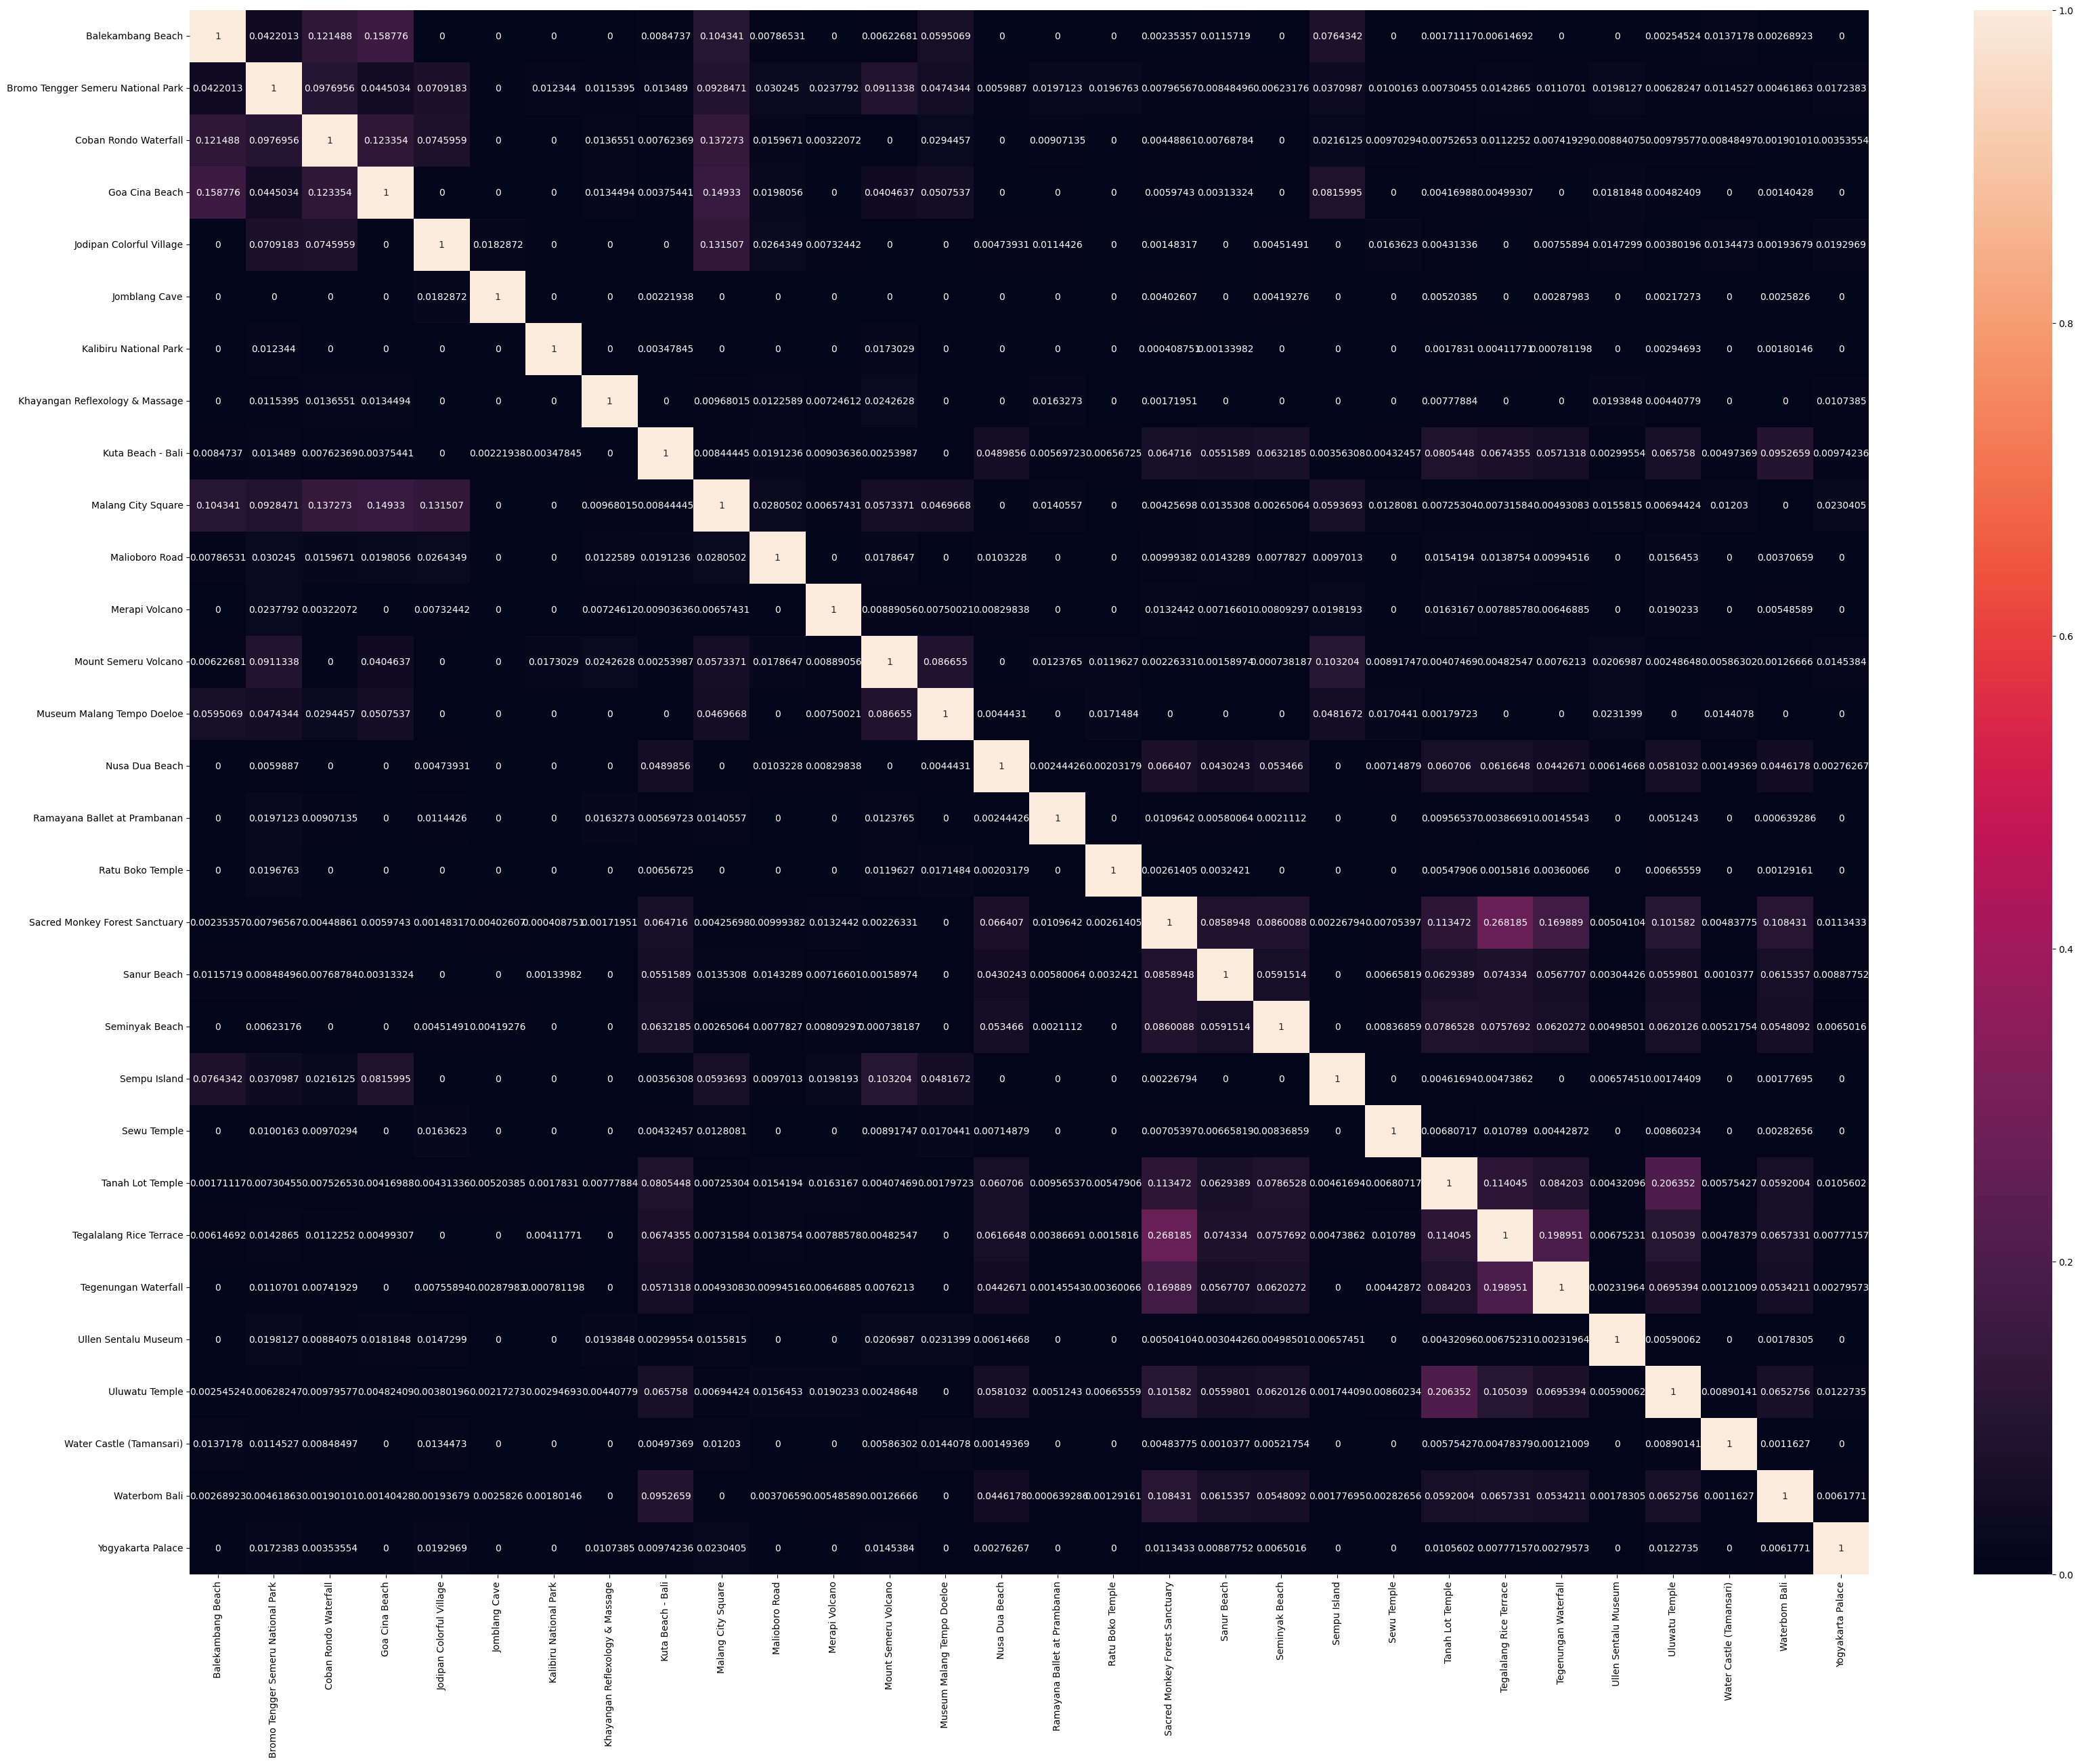

In [277]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize= (40, 30))
sns.heatmap(attraction_similarity_df, annot= True, fmt= 'g')

plt.show()

> *STEP 2: Content-Based Filtering*

In [378]:
Tourism_data.head(2)

,UserId,TransactionId,VisitYear,VisitMonth,Rating,VisitDate,VisitMode,Attraction,AttractionAddress,AttractionType,CityName,Country,Region,Continent,Average rating per user,Total visits by VisitMode per user,Average rating per attraction,Total visits per user,combined_features
0,70456,3,2022,10,1.0,2022-10-01,Couples,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Kerala,India,South East Asia,Asia,1.0,1,0.663674,1,Nature & Wildlife Areas Kerala
1,7567,8,2022,10,1.0,2022-10-01,Friends,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Belleville,Canada,South America,America,1.0,1,0.663674,1,Nature & Wildlife Areas Belleville


In [379]:
df_combined  = Tourism_data[['AttractionType','CityName','Rating','Attraction']].drop_duplicates().reset_index(drop=True)
df_combined 

,AttractionType,CityName,Rating,Attraction
0,Nature & Wildlife Areas,Kerala,1.00,Sacred Monkey Forest Sanctuary
1,Nature & Wildlife Areas,Belleville,1.00,Sacred Monkey Forest Sanctuary
2,Nature & Wildlife Areas,Squamish,1.00,Sacred Monkey Forest Sanctuary
3,Nature & Wildlife Areas,Innisfil,0.50,Sacred Monkey Forest Sanctuary
4,Nature & Wildlife Areas,Crown Point,0.50,Sacred Monkey Forest Sanctuary
...,...,...,...,...
20445,Historic Sites,Windsor,0.75,Yogyakarta Palace
20446,Historic Sites,Lilydale,0.50,Yogyakarta Palace
20447,Historic Sites,Lilydale,0.75,Yogyakarta Palace
20448,Historic Sites,Bowen,1.00,Yogyakarta Palace


In [380]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20450 entries, 0 to 20449
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AttractionType  20450 non-null  object 
 1   CityName        20450 non-null  object 
 2   Rating          20450 non-null  float64
 3   Attraction      20450 non-null  object 
dtypes: float64(1), object(3)
memory usage: 639.2+ KB


In [381]:
df_combined.shape

(20450, 4)

In [382]:
# 2️⃣ Preprocess: Combine text features for TF-IDF
df = (
    df_combined['AttractionType'].fillna('') + ' ' +
    df_combined['CityName'].fillna('') + ' ' +
    df_combined['Attraction'].fillna('') + ' ' + 
    df_combined['Rating'].fillna(0).astype(str)
    
)
df

0        Nature & Wildlife Areas Kerala Sacred Monkey F...
1        Nature & Wildlife Areas Belleville Sacred Monk...
2        Nature & Wildlife Areas Squamish Sacred Monkey...
3        Nature & Wildlife Areas Innisfil Sacred Monkey...
4        Nature & Wildlife Areas Crown Point Sacred Mon...
                               ...                        
20445        Historic Sites Windsor Yogyakarta Palace 0.75
20446        Historic Sites Lilydale Yogyakarta Palace 0.5
20447       Historic Sites Lilydale Yogyakarta Palace 0.75
20448           Historic Sites Bowen Yogyakarta Palace 1.0
20449          Historic Sites Bowen Yogyakarta Palace 0.75
Length: 20450, dtype: object

In [383]:
from sklearn.feature_extraction.text import TfidfVectorizer
# 3️⃣ Vectorize combined text using TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
tfidf

,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None
,analyzer,'word'
,stop_words,'english'
,token_pattern,'(?u)\\b\\w\\w+\\b'
,ngram_range,"(1, ...)"


In [384]:
tfidf_matrix = tfidf.fit_transform(df)
tfidf_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 132704 stored elements and shape (20450, 5050)>

In [385]:
## **converting from number format to array**
df_enc = pd.DataFrame(tfidf_matrix.toarray(),columns=tfidf.get_feature_names_out())

df_enc.head()

,25,75,ababa,ababi,abbotaford,abbotsford,abbottabad,abercorn,aberdeen,aberfoyle,...,zealand,zhejiang,zhengzhou,zhenjiang,zhongshan,zhuhai,zihuatanejo,zone,zurich,zushi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [386]:
from sklearn.neighbors import NearestNeighbors

# 4️⃣ Fit KNN model
knn = NearestNeighbors(n_neighbors=10, metric='cosine')
knn

,n_neighbors,10
,radius,1.0
,algorithm,'auto'
,leaf_size,30
,metric,'cosine'
,p,2
,metric_params,None
,n_jobs,None


In [387]:
knn.fit(tfidf_matrix)

,n_neighbors,10
,radius,1.0
,algorithm,'auto'
,leaf_size,30
,metric,'cosine'
,p,2
,metric_params,None
,n_jobs,None


In [388]:
# Prepare attraction lookup
df_attraction = Tourism_data[['AttractionType','CityName','Rating','Attraction']].drop_duplicates().reset_index(drop=True)
df_attraction

,AttractionType,CityName,Rating,Attraction
0,Nature & Wildlife Areas,Kerala,1.00,Sacred Monkey Forest Sanctuary
1,Nature & Wildlife Areas,Belleville,1.00,Sacred Monkey Forest Sanctuary
2,Nature & Wildlife Areas,Squamish,1.00,Sacred Monkey Forest Sanctuary
3,Nature & Wildlife Areas,Innisfil,0.50,Sacred Monkey Forest Sanctuary
4,Nature & Wildlife Areas,Crown Point,0.50,Sacred Monkey Forest Sanctuary
...,...,...,...,...
20445,Historic Sites,Windsor,0.75,Yogyakarta Palace
20446,Historic Sites,Lilydale,0.50,Yogyakarta Palace
20447,Historic Sites,Lilydale,0.75,Yogyakarta Palace
20448,Historic Sites,Bowen,1.00,Yogyakarta Palace


In [389]:
df_attraction.shape

(20450, 4)

In [390]:
import joblib

# 5️⃣ Save vectorizer and KNN model
joblib.dump(tfidf, 'C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project4/Project4_Code/Tourism_Experince_Analytics/models/Recommendation_Task_Model/tfidf_vectorizer.joblib')
joblib.dump(knn, 'C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project4/Project4_Code/Tourism_Experince_Analytics/models/Recommendation_Task_Model/knn_model.joblib')

# 6️⃣ (Optional) Save the dataframe with attraction names for easy lookup
df_attraction.to_csv('C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project4/Project4_Code/Tourism_Experince_Analytics/DataSets/Recommendation_Task_DataSet/attraction_lookup.csv', index=False)

print("✅ Model and vectorizer saved! Ready for Streamlit app.")


✅ Model and vectorizer saved! Ready for Streamlit app.
